# Diffusion coefficient

In this document we intend to calculate the diffusion coefficient $D_f$ for various value of $w_p$ and $\Delta T$, with the formula 
$$\log_{10}D(w_p,\Delta T) = A(\Delta T)_I - B(\Delta T)_I \cdot w_p$$ 
Let $C$ be the constant used in each region.

|             | C1          | C2          | C3            | C4            |
| :---        |    :----:   |    :----:   |     :----:    |          ---: |
| Region 1    | -4.428      | 1.842       | 0             | 8.12e-3       |
| Region 2    | 26.0        | 37.0        | 0.0797        | 0             |
| Region 3    | 159.0       | 170.0       | 0.3664        | 0             |
| Region 4    | -13.7       | 0.500       | 0             | 0             |

- $A = C1 + \Delta T \cdot C3$ , and $B = C2 - \Delta T \cdot C4$ are four elements vectors. 

Given the function $A - B \cdot w_p$. Intersection over $w_p$ given $A_i$, $A_{i+1}$, $B_i$, $B_{i+1}$ can be computed as 
$$A_i - B_i \cdot w_p = A_{i+1} - B_{i+1} \cdot w_p $$
$$A_i - A_{i+1} = (B_i - B_{i+1}) \cdot w_p $$
$$w_p = \frac{A_i - A_{i+1}}{B_i - B_{i+1}}$$
- Therefore we denote $R_{\min}(A,B) = [0 ~;~ \frac{A_{1} - A_{2}}{B_{1} - B_{2}} ~;~ \frac{A_{2} - A_{3}}{B_{2} - B_{3}}~;~ \frac{A_{3} - A_{4}}{B_{3} - B_{4}}] $ as a four elements vector, which refers to the minimum of each region.
- $I(w_p,A,B) = R_{\min}(A,B)[~ \sum(~w_p \geq R_{\min}(A,B)~ )~]$ refering to the index of region.

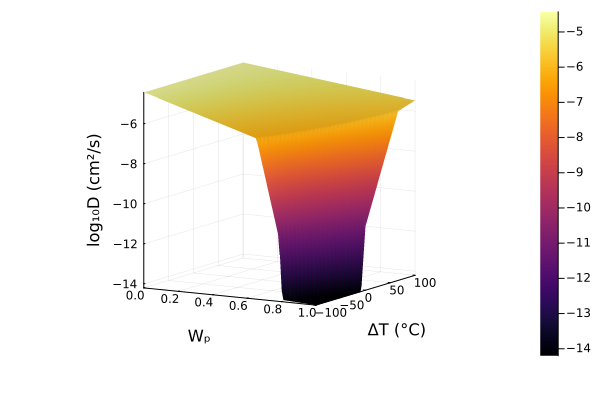

In [1]:
using DataFrames
using Plots

# Region is treated as a constant
Region = DataFrame(
    C1 = [ -4.428 ; 26.0 ; 159.0 ; -13.7 ],
    C2 = [ 1.842 ; 37.0 ; 170.0 ; 0.500 ],
    C3 = [ 0 ; 0.0797 ; 0.3664 ; 0 ],
    C4 = [ 8.12e-3 ; 0 ; 0 ; 0 ]
)

# logD = ( A - B ⋅ wₚ ) where A = C₁ + ΔT C₃ , and B = C₂ - ΔT C₄
# ΔT = Tᵣₓₙ - Tg : Tg = 70
function logD( wₚ , ΔT; unit = "cm", Region = Region)   
    scale = Dict("m" => -4,"cm" => 0,"nm" => 14)
    A = Region.C1 .+ ΔT .* Region.C3  
    B = Region.C2 .- ΔT .* Region.C4 
    # Intersection of wₚ : (aᵢ - aᵢ₊₁)/(bᵢ - bᵢ₊₁) or (aᵢ₊₁ - aᵢ)/(bᵢ₊₁ - bᵢ)
    RegionMin = [0 ; (A[[1,2,3]] .- A[[2,3,4]]) ./ (B[[1,2,3]] .- B[[2,3,4]])]
    RegionIndex = searchsortedlast(RegionMin,wₚ)
    return( ( A[RegionIndex] - B[RegionIndex] * wₚ ) + scale[unit])
end

# Plot Discretization : How fine does each axis has to discretize.
N = 101
M = 101
Wₚ = collect(range(0,1,N)) # collect turn range to a vectors of values
ΔT = collect(range(-100,100,M))

plot(Wₚ,ΔT,logD,st=[:surface],camera=(30,10),xlabel="Wₚ",ylabel="ΔT (°C)",zlabel="log₁₀D (cm²/s)")